In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from scipy import stats

from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sepeh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sepeh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Merging CSV FILES

In [2]:
apps  = pd.read_csv('apps.csv') 
apps_categories  = pd.read_csv('apps_categories.csv')
categories  = pd.read_csv('categories.csv')
key_benefits  = pd.read_csv('key_benefits.csv')
pricing_plan_features  = pd.read_csv('pricing_plan_features.csv')
pricing_plan  = pd.read_csv('pricing_plans.csv')
reviews  = pd.read_csv('reviews.csv')

In [3]:
key_benefits1 = key_benefits.groupby(['app_id'])['title'].agg(', '.join).reset_index()

In [4]:
reviews = reviews.rename(columns={'rating' : 'review_rating'})

In [5]:
apps = apps.rename(columns={'rating' : 'app_rating'})

In [6]:
pricing_plan_features = pricing_plan_features.groupby(['app_id', 'pricing_plan_id'])['feature'].agg(', '.join).reset_index()

In [7]:
reviews['app_id'].nunique()

5055

In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640633 entries, 0 to 640632
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   app_id                     640633 non-null  object
 1   author                     640543 non-null  object
 2   review_rating              640633 non-null  int64 
 3   posted_at                  640633 non-null  object
 4   body                       640472 non-null  object
 5   helpful_count              640633 non-null  int64 
 6   developer_reply            131483 non-null  object
 7   developer_reply_posted_at  131483 non-null  object
dtypes: int64(2), object(6)
memory usage: 39.1+ MB


In [9]:
apps['id'].nunique()

7341

In [10]:
df1 = reviews.merge(apps, left_on = 'app_id', right_on = 'id' )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640633 entries, 0 to 640632
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   app_id                     640633 non-null  object 
 1   author                     640543 non-null  object 
 2   review_rating              640633 non-null  int64  
 3   posted_at                  640633 non-null  object 
 4   body                       640472 non-null  object 
 5   helpful_count              640633 non-null  int64  
 6   developer_reply            131483 non-null  object 
 7   developer_reply_posted_at  131483 non-null  object 
 8   id                         640633 non-null  object 
 9   url                        640633 non-null  object 
 10  title                      640633 non-null  object 
 11  developer                  640633 non-null  object 
 12  developer_link             640633 non-null  object 
 13  icon                       64

In [11]:
df2 = df1.merge(pricing_plan_features, left_on = 'id', right_on = 'app_id', how = 'left')


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640633 entries, 0 to 640632
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   app_id_x                   640633 non-null  object 
 1   author                     640543 non-null  object 
 2   review_rating              640633 non-null  int64  
 3   posted_at                  640633 non-null  object 
 4   body                       640472 non-null  object 
 5   helpful_count              640633 non-null  int64  
 6   developer_reply            131483 non-null  object 
 7   developer_reply_posted_at  131483 non-null  object 
 8   id                         640633 non-null  object 
 9   url                        640633 non-null  object 
 10  title                      640633 non-null  object 
 11  developer                  640633 non-null  object 
 12  developer_link             640633 non-null  object 
 13  icon                       64

In [13]:
# export = df2[['body', 'review_rating']].sample(100)
# export.to_csv('export.csv')

## EDA & Wrangling

In [14]:
apps  = pd.read_csv('export.csv') 

In [15]:
apps_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10164 entries, 0 to 10163
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   app_id       10164 non-null  object
 1   category_id  10164 non-null  object
dtypes: object(2)
memory usage: 158.9+ KB


In [16]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      9 non-null      object
 1   title   9 non-null      object
dtypes: object(2)
memory usage: 272.0+ bytes


In [17]:
categories

,id,title
0,c769c2bd15500dd906102d9be97fdceb,Marketing
1,3be6496a88459c633342f1ec6e2be5f4,Store management
2,c3f9db73c29bc33607778f9935c3c4dc,Store design
3,8a496e4dcb443b1c529e75d7ec2888df,Conversion
4,06c707e64951fc6bb9ba7e6e26d252eb,Merchandising
5,55364684d194fd0609256c91815da2f8,Fulfillment
6,42cc15e8b6b21654e62bf0e7cddd6fbe,Shipping and delivery
7,060dca13af57b4f1a7d2f2deb799b437,Customer service
8,fe2d1df189bb587a233066f7491dfd56,Sourcing and selling products


In [18]:
apps_categories

,app_id,category_id
0,afbe525f-d512-4951-8edc-582df3ce6aa7,c769c2bd15500dd906102d9be97fdceb
1,afbe525f-d512-4951-8edc-582df3ce6aa7,3be6496a88459c633342f1ec6e2be5f4
2,9594ccfa-9ef9-42a2-823c-e270489bcb88,c3f9db73c29bc33607778f9935c3c4dc
3,9594ccfa-9ef9-42a2-823c-e270489bcb88,c769c2bd15500dd906102d9be97fdceb
4,9594ccfa-9ef9-42a2-823c-e270489bcb88,8a496e4dcb443b1c529e75d7ec2888df
...,...,...
10159,c539419e-1eac-48d4-8131-35a542ad7520,8a496e4dcb443b1c529e75d7ec2888df
10160,b5c8358f-f005-4565-af38-117e722f1f80,060dca13af57b4f1a7d2f2deb799b437
10161,b5c8358f-f005-4565-af38-117e722f1f80,3be6496a88459c633342f1ec6e2be5f4
10162,92e5d7fa-aa5c-4f45-9614-01861c058ba6,8a496e4dcb443b1c529e75d7ec2888df


In [19]:
categories2 = apps_categories.merge(categories,how = 'left', left_on = 'category_id', right_on = 'id').rename(columns={'title': 'categories'}).drop(['category_id', 'id'], axis = 1)

In [20]:
categories2

,app_id,categories
0,afbe525f-d512-4951-8edc-582df3ce6aa7,Marketing
1,afbe525f-d512-4951-8edc-582df3ce6aa7,Store management
2,9594ccfa-9ef9-42a2-823c-e270489bcb88,Store design
3,9594ccfa-9ef9-42a2-823c-e270489bcb88,Marketing
4,9594ccfa-9ef9-42a2-823c-e270489bcb88,Conversion
...,...,...
10159,c539419e-1eac-48d4-8131-35a542ad7520,Conversion
10160,b5c8358f-f005-4565-af38-117e722f1f80,Customer service
10161,b5c8358f-f005-4565-af38-117e722f1f80,Store management
10162,92e5d7fa-aa5c-4f45-9614-01861c058ba6,Conversion


In [21]:
categories

,id,title
0,c769c2bd15500dd906102d9be97fdceb,Marketing
1,3be6496a88459c633342f1ec6e2be5f4,Store management
2,c3f9db73c29bc33607778f9935c3c4dc,Store design
3,8a496e4dcb443b1c529e75d7ec2888df,Conversion
4,06c707e64951fc6bb9ba7e6e26d252eb,Merchandising
5,55364684d194fd0609256c91815da2f8,Fulfillment
6,42cc15e8b6b21654e62bf0e7cddd6fbe,Shipping and delivery
7,060dca13af57b4f1a7d2f2deb799b437,Customer service
8,fe2d1df189bb587a233066f7491dfd56,Sourcing and selling products


In [22]:
categories['id'].nunique()

9

In [23]:
categories2 = categories2.groupby(['app_id'])['categories'].agg(', '.join).reset_index()

In [24]:
categories2

,app_id,categories
0,002023de-1707-46d2-8cf4-919be20bfd32,"Conversion, Merchandising, Fulfillment"
1,00210ef0-4b8d-4adc-a414-2ba93e8e30ff,"Marketing, Store management, Fulfillment"
2,0023b916-e3e7-420f-980b-c998eb092c66,"Marketing, Merchandising"
3,002bc703-5857-4d3c-8696-0a1a8d49b9a1,Merchandising
4,0047561b-c560-4054-89e9-5aef78faea43,Store design
...,...,...
7336,ffd8cc49-f08f-40b6-9856-7bc1aae942a4,"Store management, Fulfillment, Shipping and de..."
7337,ffe11f11-edfe-462f-8e8a-ef03d9777163,Store design
7338,fff05daf-73db-421e-ba10-ff61dfbdef7d,Marketing
7339,fff4d6a3-3e14-4f09-8590-1f79dfacd6a5,Store management


In [25]:
df2.columns

Index(['app_id_x', 'author', 'review_rating', 'posted_at', 'body',
       'helpful_count', 'developer_reply', 'developer_reply_posted_at', 'id',
       'url', 'title', 'developer', 'developer_link', 'icon', 'app_rating',
       'reviews_count', 'description_raw', 'description', 'tagline',
       'pricing_hint', 'lastmod', 'app_id_y', 'pricing_plan_id', 'feature'],
      dtype='object')

In [26]:
df3 = df2.merge(categories2, how = 'left', right_on = 'app_id', left_on = 'app_id_x').drop(['app_id_x', 'app_id_y'], axis = 1)

In [27]:
df3.columns

Index(['author', 'review_rating', 'posted_at', 'body', 'helpful_count',
       'developer_reply', 'developer_reply_posted_at', 'id', 'url', 'title',
       'developer', 'developer_link', 'icon', 'app_rating', 'reviews_count',
       'description_raw', 'description', 'tagline', 'pricing_hint', 'lastmod',
       'pricing_plan_id', 'feature', 'app_id', 'categories'],
      dtype='object')

In [28]:
pricing_plan

,id,app_id,title,price
0,53c9bb6f-bf78-4101-89cf-86c4fe5618e7,afbe525f-d512-4951-8edc-582df3ce6aa7,NaN,Free to install
1,5db4ab6c-c3b6-43af-8b47-e439b376ff80,9594ccfa-9ef9-42a2-823c-e270489bcb88,Free plan,Free to install
2,17e8e6f9-26ee-41d3-b0c0-43895d59097d,9594ccfa-9ef9-42a2-823c-e270489bcb88,Up to 500 contacts,$18/month
3,bbb6da74-9eb8-493a-94d8-e780b1e0eeb7,cd229797-5798-4465-a313-2e27ce44e01d,NaN,$3.99/month
4,3eb15591-bf5a-4c01-9fe4-d382058099e1,6e07c6c8-8617-43d2-9a88-bafcbfe82f7f,Standard,$29/month
...,...,...,...,...
12196,65fc9797-e004-4830-bf32-28b2bf58cbef,b5c8358f-f005-4565-af38-117e722f1f80,NaN,$4.95/month
12197,274389c0-7ce2-4c9f-b015-f37635a60544,92e5d7fa-aa5c-4f45-9614-01861c058ba6,For Basic Shopify,$4.90/month
12198,5361ada6-b58e-47d0-b90b-cdb862ceaf7d,92e5d7fa-aa5c-4f45-9614-01861c058ba6,For Advanced,$8.90/month
12199,fe35f3e1-9b04-455d-82ea-73582fbc430b,92e5d7fa-aa5c-4f45-9614-01861c058ba6,For Shopify Plus,$13.90/month


In [29]:
pricing_plan['app_id'].nunique()

6017

In [30]:
pricing_plan2 = pricing_plan.groupby(['app_id'])['price'].agg(', '.join).reset_index()

In [31]:
df3

,author,review_rating,posted_at,body,helpful_count,developer_reply,developer_reply_posted_at,id,url,title,...,reviews_count,description_raw,description,tagline,pricing_hint,lastmod,pricing_plan_id,feature,app_id,categories
0,Wild Love Apparel,5,"June 3, 2022",This app has been great for gaining new custom...,0,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,https://apps.shopify.com/smsbump,SMSBump SMS Marketing by Yotpo,...,2246,"<div class=""block vc-app-listing-about-section...",What is Yotpo SMSBump? \n Yotpo SMSBump is a p...,"Text Marketing, Abandoned Cart Recovery, SMS A...",Free to install. Additional charges may apply.,2022-05-13,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,"Marketing, Conversion"
1,MinnieRoseCo,5,"June 2, 2022",I worked with Harry on a validation issue and ...,0,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,https://apps.shopify.com/smsbump,SMSBump SMS Marketing by Yotpo,...,2246,"<div class=""block vc-app-listing-about-section...",What is Yotpo SMSBump? \n Yotpo SMSBump is a p...,"Text Marketing, Abandoned Cart Recovery, SMS A...",Free to install. Additional charges may apply.,2022-05-13,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,"Marketing, Conversion"
2,MagBlaze.com,5,"June 2, 2022","The system is very useful, it is easy to use a...",0,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,https://apps.shopify.com/smsbump,SMSBump SMS Marketing by Yotpo,...,2246,"<div class=""block vc-app-listing-about-section...",What is Yotpo SMSBump? \n Yotpo SMSBump is a p...,"Text Marketing, Abandoned Cart Recovery, SMS A...",Free to install. Additional charges may apply.,2022-05-13,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,"Marketing, Conversion"
3,moré,5,"June 2, 2022",Great app. It has very good automation which m...,0,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,https://apps.shopify.com/smsbump,SMSBump SMS Marketing by Yotpo,...,2246,"<div class=""block vc-app-listing-about-section...",What is Yotpo SMSBump? \n Yotpo SMSBump is a p...,"Text Marketing, Abandoned Cart Recovery, SMS A...",Free to install. Additional charges may apply.,2022-05-13,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,"Marketing, Conversion"
4,Cocoa Crush,5,"June 1, 2022",The team at Yotpo SMSBump Marketing are amazin...,0,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,https://apps.shopify.com/smsbump,SMSBump SMS Marketing by Yotpo,...,2246,"<div class=""block vc-app-listing-about-section...",What is Yotpo SMSBump? \n Yotpo SMSBump is a p...,"Text Marketing, Abandoned Cart Recovery, SMS A...",Free to install. Additional charges may apply.,2022-05-13,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,"Marketing, Conversion"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640628,Gatronix,5,"Edited January 23, 2020",Awesome app. Definitely mandatory. Bots can sp...,1,Thank you so much for the nice review!,"January 24, 2020",b5c8358f-f005-4565-af38-117e722f1f80,https://apps.shopify.com/recaptcha,Zero Spam Contact Form,...,7,"<div class=""block vc-app-listing-about-section...",Tired of Getting Spam Mails in Your Inbox? \n ...,Add Google reCAPTCHA to your contact form,$4.95/month. 30-day free trial.,2022-05-09,NaN,NaN,b5c8358f-f005-4565-af38-117e722f1f80,"Customer service, Store management"
640629,PartyAnimalOnline,5,"October 8, 2019",We had a huge amount of Spam on our customer m...,1,"Thank you for the nice review :)\nBest,\nJesper","October 8, 2019",b5c8358f-f005-4565-af38-117e722f1f80,https://apps.shopify.com/recaptcha,Zero Spam Contact Form,...,7,"<div class=""block vc-app-listing-about-section...",Tired of Getting Spam Mails in Your Inbox? \n ...,Add Google reCAPTCHA to your contact form,$4.95/month. 30-day free trial.,2022-05-09,NaN,NaN,b5c8358f-f005-4565-af38-117e722f1f80,"Customer service, Store management"
640630,Eds Hair,5,"July 23, 2019",Very happy with the results. Initially had a ...,0,NaN,NaN,b5c8358f-f005-4565-af38-117e722f1f80,https://apps.shopify.com/recaptcha,Zero Spam Contact Form,...,7,"<div class=""bl

In [32]:
df4 = df3.merge(pricing_plan2, left_on = 'app_id', right_on = 'app_id')

## Working with Final Dataframe

### Removing Non-English scripture. This is to reduce tokens

In [33]:
# Removes east asian characters

import re

cjk_ranges = [
   r'\U00002E80-\U00002EFF',  # CJK Radicals Supplement
   r'\U00002F00-\U00002FDF',  # Kangxi Radicals
   r'\U00002FF0-\U00002FFF',  # Ideographic Description Characters
   r'\U00003000-\U0000303F',  # CJK Symbols and Punctuation
   r'\U00003040-\U0000309F',  # Hiragana
   r'\U000030A0-\U000030FF',  # Katakana
   r'\U00003100-\U0000312F',  # Bopomofo
   r'\U00003130-\U0000318F',  # Hangul Compatibility Jamo
   r'\U000031C0-\U000031EF',  # CJK Strokes
   r'\U00003200-\U000032FF',  # Enclosed CJK Letters and Months
   r'\U00003300-\U000033FF',  # CJK Compatibility
   r'\U00003400-\U00004DBF',  # CJK Unified Ideographs Extension A
   r'\U00004DC0-\U00004DFF',  # Yijing Hexagram Symbols
   r'\U00004E00-\U00009FFF',  # CJK Unified Ideographs
   r'\U0000A960-\U0000A97F',  # Hangul Jamo Extended-A
   r'\U0000AC00-\U0000D7AF',  # Hangul Syllables
   r'\U0000D7B0-\U0000D7FF',  # Hangul Jamo Extended-B
   r'\U0000F900-\U0000FAFF',  # CJK Compatibility Ideographs
   r'\U0000FE30-\U0000FE4F',  # CJK Compatibility Forms
   r'\U0000FF00-\U0000FFEF',  # Halfwidth and Fullwidth Forms (full-width Roman forms)
   r'\U0001B000-\U0001B0FF',  # Kana Supplement
   r'\U0001D300-\U0001D3FF',  # Tai Xuan Jing Symbols
   r'\U0001F200-\U0001F2FF',  # Enclosed Ideographic Supplement
   r'\U00020000-\U0002A6DF',  # CJK Unified Ideographs Extension B
   r'\U0002A700-\U0002B73F',  # CJK Unified Ideographs Extension C
   r'\U0002B740-\U0002B81F',  # CJK Unified Ideographs Extension D
   r'\U0002B820-\U0002CEAF',  # CJK Unified Ideographs Extension E
   r'\U0002CEB0-\U0002EBEF',  # CJK Unified Ideographs Extension F
   ]

def remove_cjk(text):
       # Unicode ranges for CJK characters
   
   pattern = f"[{''.join(cjk_ranges)}]+"
   return re.sub(pattern, '', text, flags=re.UNICODE)

# df4['body'] = df4['body'].fillna("").apply(remove_cjk)
# df4 = df4[df4['body'].str.strip() != ""]

In [35]:
from langdetect import detect

# create a dataframe for testing
df_test = pd.DataFrame({'reviews': ['Esto es una gran aplicación!', 'Ceci est une excellente application!','This is a great app!',  'これは素晴らしいアプリです！']})

def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

df_test['is_english'] = df_test['reviews'].apply(is_english)

df_test_2 = df_test[df_test['is_english']]
df_test_2 = df_test_2.drop(['is_english'], axis = 1).reset_index(drop = True)

print(df_test)
print()
print(df_test_2)

                                reviews  is_english
0          Esto es una gran aplicación!       False
1  Ceci est une excellente application!       False
2                  This is a great app!        True
3                        これは素晴らしいアプリです！       False

                reviews
0  This is a great app!


##### Takes a long time! Load it below instead

In [36]:
# Applying to dataset

df5 = df4.copy()
df5['is_english'] = df5['body'].apply(is_english)

df5 = df5[df5['is_english']]
df5 = df5.drop(['is_english'], axis = 1).reset_index(drop = True)

In [38]:
print(df5.shape)
print(df4.shape)
print()
print(f'Reduced number of rows by "{len(df4)-len(df5)}')

(556340, 25)
(594035, 25)

Reduced number of rows by "37695


In [36]:
# df5.to_csv('df_english.csv', index = False)

### Further Wrangling

In [37]:
# reading from csv
df5 = pd.read_csv('df_english.csv')

In [39]:
df5.columns

Index(['author', 'review_rating', 'posted_at', 'body', 'helpful_count',
       'developer_reply', 'developer_reply_posted_at', 'id', 'url', 'title',
       'developer', 'developer_link', 'icon', 'app_rating', 'reviews_count',
       'description_raw', 'description', 'tagline', 'pricing_hint', 'lastmod',
       'pricing_plan_id', 'feature', 'app_id', 'categories', 'price'],
      dtype='object')

In [40]:
df5['categories']

0                      Marketing, Conversion
1                      Marketing, Conversion
2                      Marketing, Conversion
3                      Marketing, Conversion
4                      Marketing, Conversion
                         ...                
556335    Customer service, Store management
556336    Customer service, Store management
556337    Customer service, Store management
556338    Customer service, Store management
556339    Customer service, Store management
Name: categories, Length: 556340, dtype: object

In [41]:
df5['reviews_count']

0         2246
1         2246
2         2246
3         2246
4         2246
          ... 
556335       7
556336       7
556337       7
556338       7
556339       7
Name: reviews_count, Length: 556340, dtype: int64

In [42]:
# Filter and get top 10 per category
top_10 = df5[df5['reviews_count'] > 1000].groupby('categories').apply(lambda x: x.nlargest(10, 'review_rating')).reset_index(drop=True)

In [43]:
df5['categories'].value_counts()

Store design, Marketing, Conversion               65748
Store design                                      52104
Marketing, Conversion                             51906
Conversion                                        38420
Store design, Conversion                          38052
                                                  ...  
Merchandising, Shipping and delivery                  8
Marketing, Fulfillment, Shipping and delivery         8
Marketing, Customer service, Fulfillment              6
Conversion, Customer service, Store management        4
Customer service, Merchandising, Fulfillment          3
Name: categories, Length: 99, dtype: int64

In [44]:
top_10['reviews_count']

0      1488
1      1488
2      1488
3      1488
4      1488
       ... 
315    1081
316    1081
317    1081
318    1081
319    1081
Name: reviews_count, Length: 320, dtype: int64

In [45]:
top_10

,author,review_rating,posted_at,body,helpful_count,developer_reply,developer_reply_posted_at,id,url,title,...,description_raw,description,tagline,pricing_hint,lastmod,pricing_plan_id,feature,app_id,categories,price
0,Venzey,5,"November 14, 2021",The customer service is excellent. I had my is...,0,So glad to know we were able to help you with ...,"November 15, 2021",06c477e3-490d-40c6-ac49-af6bed97eeaa,https://apps.shopify.com/discounted-upsells,Booster: Discounted Upsells,...,"<div class=""block vc-app-listing-about-section...",Getting new paying customers to your store is ...,More Upsells = More Sales. Discounted Upsells ...,From $19.99/month. 7-day free trial.,2022-05-30,NaN,NaN,06c477e3-490d-40c6-ac49-af6bed97eeaa,Conversion,"$19.99/month, $29.99/month, $44.99/month"
1,Aurora Light Poles,5,"August 31, 2021",Great app to upsell and make more sales. Great...,0,We're so happy that our app is helping your Sh...,"August 31, 2021",06c477e3-490d-40c6-ac49-af6bed97eeaa,https://apps.shopify.com/discounted-upsells,Booster: Discounted Upsells,...,"<div class=""block vc-app-listing-about-section...",Getting new paying customers to your store is ...,More Upsells = More Sales. Discounted Upsells ...,From $19.99/month. 7-day free trial.,2022-05-30,NaN,NaN,06c477e3-490d-40c6-ac49-af6bed97eeaa,Conversion,"$19.99/month, $29.99/month, $44.99/month"
2,Mystic Moon Goddess,5,"November 3, 2020",Great App! Super easy to add upsells in your s...,0,NaN,NaN,06c477e3-490d-40c6-ac49-af6bed97eeaa,https://apps.shopify.com/discounted-upsells,Booster: Discounted Upsells,...,"<div class=""block vc-app-listing-about-section...",Getting new paying customers to your store is ...,More Upsells = More Sales. Discounted Upsells ...,From $19.99/month. 7-day free trial.,2022-05-30,NaN,NaN,06c477e3-490d-40c6-ac49-af6bed97eeaa,Conversion,"$19.99/month, $29.99/month, $44.99/month"
3,Crimibox,5,"October 28, 2020",This app has made us more than 70.000 Euro in ...,0,NaN,NaN,06c477e3-490d-40c6-ac49-af6bed97eeaa,https://apps.shopify.com/discounted-upsells,Booster: Discounted Upsells,...,"<div class=""block vc-app-listing-about-section...",Getting new paying customers to your store is ...,More Upsells = More Sales. Discounted Upsells ...,From $19.99/month. 7-day free trial.,2022-05-30,NaN,NaN,06c477e3-490d-40c6-ac49-af6bed97eeaa,Conversion,"$19.99/month, $29.99/month, $44.99/month"
4,Dog Passion Store,5,"April 13, 2018",great!! Recommend it !Helps the sales a lot !,0,NaN,NaN,06c477e3-490d-40c6-ac49-af6bed97eeaa,https://apps.shopify.com/discounted-upsells,Booster: Discounted Upsells,...,"<div class=""block vc-app-listing-about-section...",Getting new paying customers to your store is ...,More Upsells = More Sales. Discounted Upsells ...,From $19.99/month. 7-day free trial.,2022-05-30,NaN,NaN,06c477e3-490d-40c6-ac49-af6bed97eeaa,Conversion,"$19.99/month, $29.99/month, $44.99/month"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,DirDirect,5,"May 2, 2022",Took us less than an hour to design a great lo...,0,That's great to hear. Thanks for using our app...,"May 2, 2022",39fca9ff-f048-45ba-85b1-a8a6b92b891d,https://apps.shopify.com/order-printer-templates,Order Printer Templates,...,"<div class=""block vc-app-listing-about-section...","These professional invoice, packing slip & ret...","Custom invoice, receipt, packing slip & return...",Free to install. Additional charges may apply.,2022-05-12,NaN,NaN,39fca9ff-f048-45ba-85b1-a8a6b92b891d,"Store management, Fulfillment, Shipping and de...",Free to install
316,The Paddy Box,5,"April 25, 2022",We used this app to customise our packing slip...,0,Thanks for the recommendation and for leaving ...,"April 26, 2022",39fca9ff-f048-45ba-85b1-a8a6b92b891d,https://apps.shopify.com/order-printer-templates,Order Printer Templates,...,"<div class=""block vc-app-listing-about-section...","These professional invoice, packing slip & ret...","Custom invoice, receipt, packing slip & return...",Free to insta

In [46]:
categories

,id,title
0,c769c2bd15500dd906102d9be97fdceb,Marketing
1,3be6496a88459c633342f1ec6e2be5f4,Store management
2,c3f9db73c29bc33607778f9935c3c4dc,Store design
3,8a496e4dcb443b1c529e75d7ec2888df,Conversion
4,06c707e64951fc6bb9ba7e6e26d252eb,Merchandising
5,55364684d194fd0609256c91815da2f8,Fulfillment
6,42cc15e8b6b21654e62bf0e7cddd6fbe,Shipping and delivery
7,060dca13af57b4f1a7d2f2deb799b437,Customer service
8,fe2d1df189bb587a233066f7491dfd56,Sourcing and selling products


In [47]:
df5

,author,review_rating,posted_at,body,helpful_count,developer_reply,developer_reply_posted_at,id,url,title,...,description_raw,description,tagline,pricing_hint,lastmod,pricing_plan_id,feature,app_id,categories,price
0,Wild Love Apparel,5,"June 3, 2022",This app has been great for gaining new custom...,0,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,https://apps.shopify.com/smsbump,SMSBump SMS Marketing by Yotpo,...,"<div class=""block vc-app-listing-about-section...",What is Yotpo SMSBump? \n Yotpo SMSBump is a p...,"Text Marketing, Abandoned Cart Recovery, SMS A...",Free to install. Additional charges may apply.,2022-05-13,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,"Marketing, Conversion",Free to install
1,MinnieRoseCo,5,"June 2, 2022",I worked with Harry on a validation issue and ...,0,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,https://apps.shopify.com/smsbump,SMSBump SMS Marketing by Yotpo,...,"<div class=""block vc-app-listing-about-section...",What is Yotpo SMSBump? \n Yotpo SMSBump is a p...,"Text Marketing, Abandoned Cart Recovery, SMS A...",Free to install. Additional charges may apply.,2022-05-13,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,"Marketing, Conversion",Free to install
2,MagBlaze.com,5,"June 2, 2022","The system is very useful, it is easy to use a...",0,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,https://apps.shopify.com/smsbump,SMSBump SMS Marketing by Yotpo,...,"<div class=""block vc-app-listing-about-section...",What is Yotpo SMSBump? \n Yotpo SMSBump is a p...,"Text Marketing, Abandoned Cart Recovery, SMS A...",Free to install. Additional charges may apply.,2022-05-13,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,"Marketing, Conversion",Free to install
3,moré,5,"June 2, 2022",Great app. It has very good automation which m...,0,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,https://apps.shopify.com/smsbump,SMSBump SMS Marketing by Yotpo,...,"<div class=""block vc-app-listing-about-section...",What is Yotpo SMSBump? \n Yotpo SMSBump is a p...,"Text Marketing, Abandoned Cart Recovery, SMS A...",Free to install. Additional charges may apply.,2022-05-13,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,"Marketing, Conversion",Free to install
4,Cocoa Crush,5,"June 1, 2022",The team at Yotpo SMSBump Marketing are amazin...,0,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,https://apps.shopify.com/smsbump,SMSBump SMS Marketing by Yotpo,...,"<div class=""block vc-app-listing-about-section...",What is Yotpo SMSBump? \n Yotpo SMSBump is a p...,"Text Marketing, Abandoned Cart Recovery, SMS A...",Free to install. Additional charges may apply.,2022-05-13,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,"Marketing, Conversion",Free to install
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556335,Gatronix,5,"Edited January 23, 2020",Awesome app. Definitely mandatory. Bots can sp...,1,Thank you so much for the nice review!,"January 24, 2020",b5c8358f-f005-4565-af38-117e722f1f80,https://apps.shopify.com/recaptcha,Zero Spam Contact Form,...,"<div class=""block vc-app-listing-about-section...",Tired of Getting Spam Mails in Your Inbox? \n ...,Add Google reCAPTCHA to your contact form,$4.95/month. 30-day free trial.,2022-05-09,NaN,NaN,b5c8358f-f005-4565-af38-117e722f1f80,"Customer service, Store management",$4.95/month
556336,PartyAnimalOnline,5,"October 8, 2019",We had a huge amount of Spam on our customer m...,1,"Thank you for the nice review :)\nBest,\nJesper","October 8, 2019",b5c8358f-f005-4565-af38-117e722f1f80,https://apps.shopify.com/recaptcha,Zero Spam Contact Form,...,"<div class=""block vc-app-listing-about-section...",Tired of Getting Spam Mails in Your Inbox? \n ...,Add Google reCAPTCHA to your contact form,$4.95/month. 30-day free trial.,2022-05-09,NaN,NaN,b5c8358f-f005-4565-af38-117e722f1f80,"Customer service, Store management",$4.95/month
556337,Eds Hair,5,"July 23, 2019",Very happy with the results. Initially had a ...,0,NaN,NaN,b5c8358f-f005-4565-af38-117e722f1f80,https://apps.

### Since we do not have app launch date, we will use earliest and latest review posted date to determine approximately how long the app has been running. This will determine its popularity by calculating review_count/day

In [283]:
df6 = df5.copy()

import dateutil.parser as dparser

# Define a function to parse the date from different formats
def parse_date(date_str):
    try:
        return dparser.parse(date_str, fuzzy=True)
    except:
        return None

#  Convert to dattime
df6['posted_at'] = df6['posted_at'].apply(parse_date)

In [284]:
# Group by 'title' and calculate the duration
earliest_latest_dates = df6.groupby('title')['posted_at'].agg(['min', 'max'])
earliest_latest_dates['duration'] = earliest_latest_dates['max'] - earliest_latest_dates['min']

# Print the updated DataFrame
print(earliest_latest_dates)

                                      min        max  duration
title                                                         
#1 Refer A Friend Loyalty App  2015-04-01 2022-02-19 2516 days
01supply ‑ Dropship Suppliers  2022-01-20 2022-01-20    0 days
10XDrop ‑ Dropshipping         2022-02-17 2022-02-18    1 days
123 Form Builder               2018-06-07 2022-05-17 1440 days
17TRACK Order Tracking & Email 2021-05-20 2022-06-02  378 days
...                                   ...        ...       ...
vwala: Influencer Marketing    2017-07-23 2020-11-23 1219 days
xConnector                     2019-01-28 2022-04-22 1180 days
yayloh                         2022-02-09 2022-02-17    8 days
zenquiries ‑ Help Desk & Email 2020-02-17 2020-05-01   74 days
筋斗云ERP                         2022-01-11 2022-01-11    0 days

[4168 rows x 3 columns]


In [285]:
# Merge the 'earliest_latest_dates' DataFrame with the original 'df6' DataFrame
df6 = df6.merge(earliest_latest_dates, on='title')

In [286]:
df6

,author,review_rating,posted_at,body,helpful_count,developer_reply,developer_reply_posted_at,id,url,title,...,pricing_hint,lastmod,pricing_plan_id,feature,app_id,categories,price,min,max,duration
0,Wild Love Apparel,5,2022-06-03,This app has been great for gaining new custom...,0,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,https://apps.shopify.com/smsbump,SMSBump SMS Marketing by Yotpo,...,Free to install. Additional charges may apply.,2022-05-13,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,"Marketing, Conversion",Free to install,2015-12-27,2022-06-03,2350 days
1,MinnieRoseCo,5,2022-06-02,I worked with Harry on a validation issue and ...,0,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,https://apps.shopify.com/smsbump,SMSBump SMS Marketing by Yotpo,...,Free to install. Additional charges may apply.,2022-05-13,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,"Marketing, Conversion",Free to install,2015-12-27,2022-06-03,2350 days
2,MagBlaze.com,5,2022-06-02,"The system is very useful, it is easy to use a...",0,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,https://apps.shopify.com/smsbump,SMSBump SMS Marketing by Yotpo,...,Free to install. Additional charges may apply.,2022-05-13,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,"Marketing, Conversion",Free to install,2015-12-27,2022-06-03,2350 days
3,moré,5,2022-06-02,Great app. It has very good automation which m...,0,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,https://apps.shopify.com/smsbump,SMSBump SMS Marketing by Yotpo,...,Free to install. Additional charges may apply.,2022-05-13,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,"Marketing, Conversion",Free to install,2015-12-27,2022-06-03,2350 days
4,Cocoa Crush,5,2022-06-01,The team at Yotpo SMSBump Marketing are amazin...,0,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,https://apps.shopify.com/smsbump,SMSBump SMS Marketing by Yotpo,...,Free to install. Additional charges may apply.,2022-05-13,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,"Marketing, Conversion",Free to install,2015-12-27,2022-06-03,2350 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556335,Gatronix,5,2020-01-23,Awesome app. Definitely mandatory. Bots can sp...,1,Thank you so much for the nice review!,"January 24, 2020",b5c8358f-f005-4565-af38-117e722f1f80,https://apps.shopify.com/recaptcha,Zero Spam Contact Form,...,$4.95/month. 30-day free trial.,2022-05-09,NaN,NaN,b5c8358f-f005-4565-af38-117e722f1f80,"Customer service, Store management",$4.95/month,2017-06-06,2022-05-20,1809 days
556336,PartyAnimalOnline,5,2019-10-08,We had a huge amount of Spam on our customer m...,1,"Thank you for the nice review :)\nBest,\nJesper","October 8, 2019",b5c8358f-f005-4565-af38-117e722f1f80,https://apps.shopify.com/recaptcha,Zero Spam Contact Form,...,$4.95/month. 30-day free trial.,2022-05-09,NaN,NaN,b5c8358f-f005-4565-af38-117e722f1f80,"Customer service, Store management",$4.95/month,2017-06-06,2022-05-20,1809 days
556337,Eds Hair,5,2019-07-23,Very happy with the results. Initially had a ...,0,NaN,NaN,b5c8358f-f005-4565-af38-117e722f1f80,https://apps.shopify.com/recaptcha,Zero Spam Contact Form,...,$4.95/month. 30-day free trial.,2022-05-09,NaN,NaN,b5c8358f-f005-4565-af38-117e722f1f80,"Customer service, Store management",$4.95/month,2017-06-06,2022-05-20,1809 days
556338,Ldsrate Com,1,2017-07-27,Junk! Does not work on Mobile iphone Safari!!!...,7,"Dear Ldsrate Com, thanks for the review of our...","June 28, 2019",b5c8358f-f005-4565-af38-117e722f1f80,https://apps.shopify.com/recaptcha,Zero Spam Contact Form,...,$4.95/month. 30-day free trial.,2022-05-09,NaN,NaN,b5c8358f-f005-4565-af38-117e722f1f80,"Customer service, Store management",$4.95/month,2017-06-06,2022-05-20,1809 days


In [287]:
# Calculate 'reviews_count/day' by dividing 'reviews_count' by 'duration' and store it in a new column
df6['reviews_count/day'] = df6['reviews_count'] / df6['duration'].dt.days
df6.head(3)

,author,review_rating,posted_at,body,helpful_count,developer_reply,developer_reply_posted_at,id,url,title,...,lastmod,pricing_plan_id,feature,app_id,categories,price,min,max,duration,reviews_count/day
0,Wild Love Apparel,5,2022-06-03,This app has been great for gaining new custom...,0,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,https://apps.shopify.com/smsbump,SMSBump SMS Marketing by Yotpo,...,2022-05-13,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,"Marketing, Conversion",Free to install,2015-12-27,2022-06-03,2350 days,0.955745
1,MinnieRoseCo,5,2022-06-02,I worked with Harry on a validation issue and ...,0,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,https://apps.shopify.com/smsbump,SMSBump SMS Marketing by Yotpo,...,2022-05-13,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,"Marketing, Conversion",Free to install,2015-12-27,2022-06-03,2350 days,0.955745
2,MagBlaze.com,5,2022-06-02,"The system is very useful, it is easy to use a...",0,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,https://apps.shopify.com/smsbump,SMSBump SMS Marketing by Yotpo,...,2022-05-13,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,"Marketing, Conversion",Free to install,2015-12-27,2022-06-03,2350 days,0.955745


In [290]:
df6['reviews_count/day'].describe()

count    5.563400e+05
mean              inf
std               NaN
min      8.503401e-04
25%      2.158654e-01
50%      6.716717e-01
75%      2.468067e+00
max               inf
Name: reviews_count/day, dtype: float64

In [292]:
# Round the values in the 'reviews_count/day' column to 3 decimal points
df6['reviews_count/day'] = df6['reviews_count/day'].round(3)

In [54]:
# Since inf and NaN values:

# Replace NaN with 0 in the 'reviews_count/day' column
df6['reviews_count/day'].fillna(0, inplace=True)

# Replace inf with the maximum value in the 'reviews_count/day' column
max_value = df6['reviews_count/day'].replace(np.inf, np.nan).max()
df6['reviews_count/day'].replace(np.inf, max_value, inplace=True)

In [293]:
df6.head(3)

,author,review_rating,posted_at,body,helpful_count,developer_reply,developer_reply_posted_at,id,url,title,...,lastmod,pricing_plan_id,feature,app_id,categories,price,min,max,duration,reviews_count/day
0,Wild Love Apparel,5,2022-06-03,This app has been great for gaining new custom...,0,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,https://apps.shopify.com/smsbump,SMSBump SMS Marketing by Yotpo,...,2022-05-13,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,"Marketing, Conversion",Free to install,2015-12-27,2022-06-03,2350 days,0.956
1,MinnieRoseCo,5,2022-06-02,I worked with Harry on a validation issue and ...,0,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,https://apps.shopify.com/smsbump,SMSBump SMS Marketing by Yotpo,...,2022-05-13,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,"Marketing, Conversion",Free to install,2015-12-27,2022-06-03,2350 days,0.956
2,MagBlaze.com,5,2022-06-02,"The system is very useful, it is easy to use a...",0,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,https://apps.shopify.com/smsbump,SMSBump SMS Marketing by Yotpo,...,2022-05-13,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,"Marketing, Conversion",Free to install,2015-12-27,2022-06-03,2350 days,0.956


In [294]:
df6['reviews_count/day'].describe()

count    556340.000
mean            inf
std             NaN
min           0.001
25%           0.216
50%           0.672
75%           2.468
max             inf
Name: reviews_count/day, dtype: float64

In [295]:
df6['app_rating'].describe()

count    556340.000000
mean          4.711767
std           0.329445
min           1.000000
25%           4.600000
50%           4.800000
75%           4.900000
max           5.000000
Name: app_rating, dtype: float64

ValueError: supplied range of [0.001, inf] is not finite

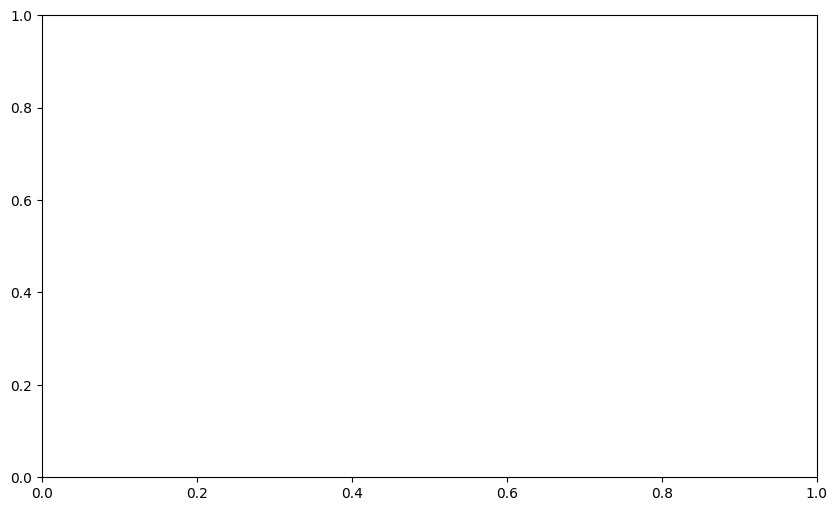

In [296]:
# histogram of the 'reviews_count/day' column
plt.figure(figsize=(10, 6))
plt.hist(df6['reviews_count/day'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Reviews Count per Day')
plt.ylabel('Frequency')
plt.title('Distribution of Reviews Count per Day')
plt.show()

Separating into categories before filtering for top performing apps

In [ ]:
#separating into dataframes

marketing = df6[df6['categories'].str.contains('marketing', case=False)]
store_management = df6[df6['categories'].str.contains('Store management', case=False)]
store_design = df6[df6['categories'].str.contains('Store design', case=False)]
merchandising = df6[df6['categories'].str.contains('Merchandising', case=False)]
fulfillment = df6[df6['categories'].str.contains('Fulfillment', case=False)]
shipping = df6[df6['categories'].str.contains('Shipping and delivery', case=False)]
service = df6[df6['categories'].str.contains('Customer service', case=False)]
sourcing = df6[df6['categories'].str.contains('Sourcing and selling products', case=False)]
conversion = df6[df6['categories'].str.contains('Conversion', case=False)]

# verify
print(marketing.shape)
marketing.head(3)

(238563, 29)


,author,review_rating,posted_at,body,helpful_count,developer_reply,developer_reply_posted_at,id,url,title,...,lastmod,pricing_plan_id,feature,app_id,categories,price,min,max,duration,reviews_count/day
0,Wild Love Apparel,5,2022-06-03,This app has been great for gaining new custom...,0,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,https://apps.shopify.com/smsbump,SMSBump SMS Marketing by Yotpo,...,2022-05-13,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,"Marketing, Conversion",Free to install,2015-12-27,2022-06-03,2350 days,0.955745
1,MinnieRoseCo,5,2022-06-02,I worked with Harry on a validation issue and ...,0,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,https://apps.shopify.com/smsbump,SMSBump SMS Marketing by Yotpo,...,2022-05-13,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,"Marketing, Conversion",Free to install,2015-12-27,2022-06-03,2350 days,0.955745
2,MagBlaze.com,5,2022-06-02,"The system is very useful, it is easy to use a...",0,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,https://apps.shopify.com/smsbump,SMSBump SMS Marketing by Yotpo,...,2022-05-13,NaN,NaN,8ff58c99-e85c-44cd-ad13-7df88fbab704,"Marketing, Conversion",Free to install,2015-12-27,2022-06-03,2350 days,0.955745


In [297]:
df_list = [marketing['app_rating'], store_management['app_rating'], store_design['app_rating'], merchandising['app_rating'], fulfillment['app_rating'], shipping['app_rating'], service['app_rating'], sourcing['app_rating'], conversion['app_rating'],]
df_names = ['marketing', 'store_management', 'store_design', 'merchandising', 'fulfillment', 'shipping', 'service', 'sourcing', 'conversion']

for df, name in zip(df_list, df_names):
    print("DataFrame Name:", name)
    print(df.describe())
    print()

DataFrame Name: marketing
count    238563.000000
mean          4.727635
std           0.287862
min           1.000000
25%           4.600000
50%           4.800000
75%           4.900000
max           5.000000
Name: app_rating, dtype: float64

DataFrame Name: store_management
count    42169.000000
mean         4.698060
std          0.430974
min          1.000000
25%          4.700000
50%          4.800000
75%          4.900000
max          5.000000
Name: app_rating, dtype: float64

DataFrame Name: store_design
count    225835.000000
mean          4.775560
std           0.216024
min           1.000000
25%           4.700000
50%           4.800000
75%           4.900000
max           5.000000
Name: app_rating, dtype: float64

DataFrame Name: merchandising
count    63463.000000
mean         4.746597
std          0.260665
min          1.000000
25%          4.700000
50%          4.800000
75%          4.900000
max          5.000000
Name: app_rating, dtype: float64

DataFrame Name: fulfillmen

- Since 25%th percentile is > mean for some cases, will do mean - 1*std
- It seems that 1 x std will not reduce marketing size so will do 0.5 x std. This reduces 254k to 146k rows

- After GPT Token cost analysis, we will actually do +1 x std

In [298]:
# Removing apps that are most unpopular for each category. This will remove apps that are highly rated by 1-2 users only

# Calculate the threshold for each DataFrame using mean-(std_amount)*std

std_amount = -1

threshold_marketing = marketing['reviews_count/day'].mean() - std_amount * marketing['reviews_count/day'].std()
threshold_store_management = store_management['reviews_count/day'].mean() - std_amount * store_management['reviews_count/day'].std()
threshold_store_design = store_design['reviews_count/day'].mean() - std_amount * store_design['reviews_count/day'].std()
threshold_merchandising = merchandising['reviews_count/day'].mean() - std_amount * merchandising['reviews_count/day'].std()
threshold_fulfillment = fulfillment['reviews_count/day'].mean() - std_amount * fulfillment['reviews_count/day'].std()
threshold_shipping = shipping['reviews_count/day'].mean() - std_amount * shipping['reviews_count/day'].std()
threshold_service = service['reviews_count/day'].mean() - std_amount * service['reviews_count/day'].std()
threshold_sourcing = sourcing['reviews_count/day'].mean() - std_amount * sourcing['reviews_count/day'].std()
threshold_conversion = conversion['reviews_count/day'].mean() - std_amount * conversion['reviews_count/day'].std()

# Filter the DataFrames based on the thresholds
marketing_filtered = marketing[marketing['reviews_count/day'] >= threshold_marketing]
store_management_filtered = store_management[store_management['reviews_count/day'] >= threshold_store_management]
store_design_filtered = store_design[store_design['reviews_count/day'] >= threshold_store_design]
merchandising_filtered = merchandising[merchandising['reviews_count/day'] >= threshold_merchandising]
fulfillment_filtered = fulfillment[fulfillment['reviews_count/day'] >= threshold_fulfillment]
shipping_filtered = shipping[shipping['reviews_count/day'] >= threshold_shipping]
service_filtered = service[service['reviews_count/day'] >= threshold_service]
sourcing_filtered = sourcing[sourcing['reviews_count/day'] >= threshold_sourcing]
conversion_filtered = conversion[conversion['reviews_count/day'] >= threshold_conversion]

# Verify the shape of the 'marketing' DataFrame after filtering
print(marketing_filtered.shape)


(26612, 29)


238k to 26k

In [299]:
# Filtering for top percentile% rated app for each category

# set percentile
percentile = 0.75

# calculate threshold for each category
threshold_marketing = marketing_filtered['app_rating'].quantile(percentile)
threshold_store_management = store_management_filtered['app_rating'].quantile(percentile)
threshold_store_design = store_design_filtered['app_rating'].quantile(percentile)
threshold_merchandising = merchandising_filtered['app_rating'].quantile(percentile)
threshold_fulfillment = fulfillment_filtered['app_rating'].quantile(percentile)
threshold_shipping = shipping_filtered['app_rating'].quantile(percentile)
threshold_service = service_filtered['app_rating'].quantile(percentile)
threshold_sourcing = sourcing_filtered['app_rating'].quantile(percentile)
threshold_conversion = conversion_filtered['app_rating'].quantile(percentile)

# Filter the DataFrames based on the top 15% thresholds
marketing_filtered_2 = marketing_filtered[marketing_filtered['app_rating'] >= threshold_marketing]
store_management_filtered_2 = store_management_filtered[store_management_filtered['app_rating'] >= threshold_store_management]
store_design_filtered_2 = store_design_filtered[store_design_filtered['app_rating'] >= threshold_store_design]
merchandising_filtered_2 = merchandising_filtered[merchandising_filtered['app_rating'] >= threshold_merchandising]
fulfillment_filtered_2 = fulfillment_filtered[fulfillment_filtered['app_rating'] >= threshold_fulfillment]
shipping_filtered_2 = shipping_filtered[shipping_filtered['app_rating'] >= threshold_shipping]
service_filtered_2 = service_filtered[service_filtered['app_rating'] >= threshold_service]
sourcing_filtered_2 = sourcing_filtered[sourcing_filtered['app_rating'] >= threshold_sourcing]
conversion_filtered_2 = conversion_filtered[conversion_filtered['app_rating'] >= threshold_conversion]

# Verify the shape of the 'marketing' DataFrame after filtering
print(marketing_filtered_2.shape)

(23297, 29)


26k for maketing reduced to 23k

In [300]:
final_df = pd.concat([marketing_filtered_2, store_management_filtered_2, store_design_filtered_2, merchandising_filtered_2, fulfillment_filtered_2, shipping_filtered_2, service_filtered_2, sourcing_filtered_2, conversion_filtered_2,]).drop_duplicates()
final_df.shape

(52784, 29)

590k reduced to 52k

### Removing Unecessary Features

In [301]:
final_df['developer'].value_counts()

Privy                     23171
Loox                       7241
PageFly                    6134
DSers                      5363
Automizely & AfterShip     3960
                          ...  
Validation.com, Inc.          1
Speed Ecom                    1
Vesta Corporation             1
Thalia                        1
60seconds                     1
Name: developer, Length: 459, dtype: int64

In [302]:
final_df['author'].value_counts()

Neonux                      3
BeSpartanFit                3
Remote Practice Managers    3
easy4home                   3
ROYCELIFE                   3
                           ..
Mandalartes                 1
My Spoiled Buddy            1
Blaze And Leaf              1
Rediimpex                   1
60 Seconds Demo             1
Name: author, Length: 51696, dtype: int64

In [303]:
final_df['helpful_count'].describe()

count    52784.000000
mean         0.079323
std          0.668933
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         29.000000
Name: helpful_count, dtype: float64

In [304]:
final_df_full = final_df.copy()

In [305]:
final_df.drop(['pricing_hint', 'app_id', 'pricing_plan_id', 'description_raw', 
               'feature', 'icon', 'developer_reply', 'developer_reply_posted_at', 'developer_link',
               'id', 'author', 'duration', 'min', 'max',
               'reviews_count/day', 'helpful_count',
               'posted_at', 'url', 'lastmod', 'reviews_count'], axis = 1, inplace=True)
final_df.reset_index(drop=True, inplace=True)
final_df

,review_rating,body,title,developer,app_rating,description,tagline,categories,price
0,5,A fantastic app that has definitely helped my ...,"Privy ‑ Pop Ups, Email, & SMS",Privy,4.6,Privy is trusted by small and large e-commerce...,"Email Marketing, SMS, Pop Ups, Cross Sell, Ban...","Store design, Marketing, Conversion","Free to install, $15/month, $45/month, $70/month"
1,5,GREAT APP! The experience after purchase is in...,"Privy ‑ Pop Ups, Email, & SMS",Privy,4.6,Privy is trusted by small and large e-commerce...,"Email Marketing, SMS, Pop Ups, Cross Sell, Ban...","Store design, Marketing, Conversion","Free to install, $15/month, $45/month, $70/month"
2,5,The experience after the purchase is incredibl...,"Privy ‑ Pop Ups, Email, & SMS",Privy,4.6,Privy is trusted by small and large e-commerce...,"Email Marketing, SMS, Pop Ups, Cross Sell, Ban...","Store design, Marketing, Conversion","Free to install, $15/month, $45/month, $70/month"
3,5,I downloaded Privy on accident but I have been...,"Privy ‑ Pop Ups, Email, & SMS",Privy,4.6,Privy is trusted by small and large e-commerce...,"Email Marketing, SMS, Pop Ups, Cross Sell, Ban...","Store design, Marketing, Conversion","Free to install, $15/month, $45/month, $70/month"
4,5,Jenna went above and beyond to help me and tak...,"Privy ‑ Pop Ups, Email, & SMS",Privy,4.6,Privy is trusted by small and large e-commerce...,"Email Marketing, SMS, Pop Ups, Cross Sell, Ban...","Store design, Marketing, Conversion","Free to install, $15/month, $45/month, $70/month"
...,...,...,...,...,...,...,...,...,...
52779,5,Great App for our needs and it is free to inst...,Lury: Make an Offer,Lury,5.0,What is Lury app \n It lets your customers neg...,Customer made discounts closed by your price. ...,Conversion,Free to install
52780,5,"awesome app, easy to use, cheap and has all th...",Cart Slide,ThanhBT App,5.0,Cart Slide will show a cart slide out when you...,Lets you cart slide from the right!,Conversion,$4.95/month
52781,5,The support is really good. Fast response and ...,Boleto Recovery,APPsEcommerce,5.0,"Obs: O app é focado no mercado brasileiro, sup...",Recupere boletos de forma automatizada e aumen...,Conversion,"$14.99/month, $26.99/month, $49.99/month, $89...."
52782,5,It's a very useful and user friendly app. Just...,SP: Similar Products,Infinity Tools,5.0,Similar Products makes your customer purchases...,Similar and frequently bought together product...,Conversion,$4.99/month


In [306]:
# Export
# final_df.to_csv('final_df.csv', index=False)

In [307]:
final_df.head(20)

,review_rating,body,title,developer,app_rating,description,tagline,categories,price
0,5,A fantastic app that has definitely helped my ...,"Privy ‑ Pop Ups, Email, & SMS",Privy,4.6,Privy is trusted by small and large e-commerce...,"Email Marketing, SMS, Pop Ups, Cross Sell, Ban...","Store design, Marketing, Conversion","Free to install, $15/month, $45/month, $70/month"
1,5,GREAT APP! The experience after purchase is in...,"Privy ‑ Pop Ups, Email, & SMS",Privy,4.6,Privy is trusted by small and large e-commerce...,"Email Marketing, SMS, Pop Ups, Cross Sell, Ban...","Store design, Marketing, Conversion","Free to install, $15/month, $45/month, $70/month"
2,5,The experience after the purchase is incredibl...,"Privy ‑ Pop Ups, Email, & SMS",Privy,4.6,Privy is trusted by small and large e-commerce...,"Email Marketing, SMS, Pop Ups, Cross Sell, Ban...","Store design, Marketing, Conversion","Free to install, $15/month, $45/month, $70/month"
3,5,I downloaded Privy on accident but I have been...,"Privy ‑ Pop Ups, Email, & SMS",Privy,4.6,Privy is trusted by small and large e-commerce...,"Email Marketing, SMS, Pop Ups, Cross Sell, Ban...","Store design, Marketing, Conversion","Free to install, $15/month, $45/month, $70/month"
4,5,Jenna went above and beyond to help me and tak...,"Privy ‑ Pop Ups, Email, & SMS",Privy,4.6,Privy is trusted by small and large e-commerce...,"Email Marketing, SMS, Pop Ups, Cross Sell, Ban...","Store design, Marketing, Conversion","Free to install, $15/month, $45/month, $70/month"
5,5,Privy has everything I was looking for when it...,"Privy ‑ Pop Ups, Email, & SMS",Privy,4.6,Privy is trusted by small and large e-commerce...,"Email Marketing, SMS, Pop Ups, Cross Sell, Ban...","Store design, Marketing, Conversion","Free to install, $15/month, $45/month, $70/month"
6,5,I use this app to give customers a discount co...,"Privy ‑ Pop Ups, Email, & SMS",Privy,4.6,Privy is trusted by small and large e-commerce...,"Email Marketing, SMS, Pop Ups, Cross Sell, Ban...","Store design, Marketing, Conversion","Free to install, $15/month, $45/month, $70/month"
7,1,Pricing structure is a lie. We canceled last m...,"Privy ‑ Pop Ups, Email, & SMS",Privy,4.6,Privy is trusted by small and large e-commerce...,"Email Marketing, SMS, Pop Ups, Cross Sell, Ban...","Store design, Marketing, Conversion","Free to install, $15/month, $45/month, $70/month"
8,1,I'm just going to keep this short and sweet. T...,"Privy ‑ Pop Ups, Email, & SMS",Privy,4.6,Privy is trusted by small and large e-commerce...,"Email Marketing, SMS, Pop Ups, Cross Sell, Ban...","Store design, Marketing, Conversion","Free to install, $15/month, $45/month, $70/month"
9,1,Terrible experience so far let's hope it gets ...,"Privy ‑ Pop Ups, Email, & SMS",Privy,4.6,Privy is trusted by small and large e-commerce...,"Email Marketing, SMS, Pop Ups, Cross Sell, Ban...","Store design, Marketing, Conversion","Free to install, $15/month, $45/month, $70/month"


In [308]:
final_df.columns

Index(['review_rating', 'body', 'title', 'developer', 'app_rating',
       'description', 'tagline', 'categories', 'price'],
      dtype='object')

In [309]:
final_df.isnull().sum()

review_rating    0
body             0
title            0
developer        0
app_rating       0
description      0
tagline          0
categories       0
price            0
dtype: int64

## Making App URL + Image URL Sheet

In [117]:
final_df_full.head(2)

,author,review_rating,posted_at,body,helpful_count,developer_reply,developer_reply_posted_at,id,url,title,...,lastmod,pricing_plan_id,feature,app_id,categories,price,min,max,duration,reviews_count/day
13972,"You Vibe, We Vibe",5,2022-05-31,A fantastic app that has definitely helped my ...,0,NaN,NaN,a66f8834-9975-4392-a70b-8e3ef47817fd,https://apps.shopify.com/privy,"Privy ‑ Pop Ups, Email, & SMS",...,2022-05-11,NaN,NaN,a66f8834-9975-4392-a70b-8e3ef47817fd,"Store design, Marketing, Conversion","Free to install, $15/month, $45/month, $70/month",2015-06-25,2022-05-31,2532 days,9.78673
13973,Modanostra,5,2022-05-31,GREAT APP! The experience after purchase is in...,0,NaN,NaN,a66f8834-9975-4392-a70b-8e3ef47817fd,https://apps.shopify.com/privy,"Privy ‑ Pop Ups, Email, & SMS",...,2022-05-11,NaN,NaN,a66f8834-9975-4392-a70b-8e3ef47817fd,"Store design, Marketing, Conversion","Free to install, $15/month, $45/month, $70/month",2015-06-25,2022-05-31,2532 days,9.78673


In [118]:
app_info = final_df_full[['id', 'title', 'url', 'icon']].copy()

In [119]:
unique_values = final_df_full['title'].nunique()
print(unique_values)

507


In [120]:
# verify same amount of titles

app_info.drop_duplicates(inplace = True)
app_info.reset_index(drop = True, inplace = True)
app_info.shape

(507, 4)

In [121]:
app_info.head(2)

,id,title,url,icon
0,a66f8834-9975-4392-a70b-8e3ef47817fd,"Privy ‑ Pop Ups, Email, & SMS",https://apps.shopify.com/privy,https://cdn.shopify.com/app-store/listing_imag...
1,c91854f6-563d-4c17-870c-14f6c022416b,Ombré – A.I. Fashion Stylist,https://apps.shopify.com/ombre,https://cdn.shopify.com/app-store/listing_imag...


In [122]:
app_info.to_csv('app_info.csv', index=False)

## Making ChatGPT Input

### CHAT GPT w/ Reviews: (TOO MANY TOKENS) *skip*

In [ ]:
# Merging all features into 1 column
df_GPT = final_df.copy()
df_GPT['Content'] = df_GPT.apply(lambda row: '; '.join([f"{col}: {row[col]}" for col in ['review_rating', 'body', 'title', 'developer', 'app_rating', 'description', 'tagline', 'categories', 'price']]), axis=1)
df_GPT['Token_Count'] = df_GPT['Content'].apply(lambda x: len(str(x).split()))

In [ ]:
df_GPT = df_GPT[['Content', 'Token_Count']]
df_GPT.reset_index(drop = True, inplace = True)
df_GPT

In [ ]:
df_GPT['Token_Count'].describe()

In [ ]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Get the set of standard English stop words
stop_words = set(stopwords.words('english'))

# Define and add the domain-specific stop words
domain_specific_stop_words = set(['app', 'download', 'user', 'screen', 'shopify'])
stop_words = stop_words.union(domain_specific_stop_words)

# Combine all the text in the 'Content' column into a single string
combined_text = ' '.join(df_GPT['Content'])

# Tokenize the text
tokens = word_tokenize(combined_text.lower())

# Remove stop words, non-alphabetic tokens, and lemmatize the tokens
tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]

# Count the occurrences of each word
word_counts = Counter(tokens)

def process_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words, non-alphabetic tokens, and tokens with fewer than 10 occurrences,
    # and lemmatize the tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words 
              and word_counts[token] >= 10]

    # Rejoin the tokens into a string and return it
    return ' '.join(tokens)

# Create a new column in the dataframe with the processed text
df_GPT['ProcessedContent'] = df_GPT['Content'].apply(process_text)

# Create a DataFrame from the word counts
df_word_counts = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])

# Remove words that appear less than 10 times
df_word_counts = df_word_counts[df_word_counts['Count'] >= 10]

# Sort the DataFrame by count in descending order
df_word_counts = df_word_counts.sort_values(by='Count', ascending=False)

# Visualize the top 51 most frequently occurring words
df_word_counts.head(51).plot(kind='bar', x='Word', y='Count', figsize=(15, 5), legend=False)
plt.title('Top 51 most frequently occurring words')
plt.ylabel('Count')
plt.xlabel('Word')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_GPT['Processed_Token_Count'] = df_GPT['ProcessedContent'].apply(lambda x: len(str(x).split()))
df_GPT

In [ ]:
df_GPT['Processed_Token_Count'].describe()

In [ ]:
df_GPT['Token_Count'].sum()

In [ ]:
df_GPT['Processed_Token_Count'].sum()

In [ ]:
df_GPT['Token_Count'].sum()-df_GPT['Processed_Token_Count'].sum()

In [ ]:
# df_GPT.to_csv('df_GPT.csv', index = False)

### Chat GPT w/ Reviews (Reduced Tokens)

In [74]:
# Creating 'Static App Features' and 'Dynamic Review Features' 
final_df2 = final_df.copy()
final_df2['Static_App_Features'] = final_df2.apply(lambda row: '; '.join([f"{col}: {row[col]}" for col in ['title', 'developer', 'app_rating', 'description', 'tagline', 'categories', 'price']]), axis=1)

final_df2['Dynamic_Review_Features'] = final_df2.apply(lambda row: '; '.join([f"{col}: {row[col]}" for col in ['review_rating', 'body']]), axis=1)

# Group by app and aggregate the dynamic features
final_df2_grouped = final_df2.groupby('title').agg({'Static_App_Features': 'first', 'Dynamic_Review_Features': lambda x: '; '.join(x)}).reset_index()
final_df2

,review_rating,body,title,developer,app_rating,description,tagline,categories,price,Static_App_Features,Dynamic_Review_Features
0,5,A fantastic app that has definitely helped my ...,"Privy ‑ Pop Ups, Email, & SMS",Privy,4.6,Privy is trusted by small and large e-commerce...,"Email Marketing, SMS, Pop Ups, Cross Sell, Ban...","Store design, Marketing, Conversion","Free to install, $15/month, $45/month, $70/month","title: Privy ‑ Pop Ups, Email, & SMS; develope...",review_rating: 5; body: A fantastic app that h...
1,5,GREAT APP! The experience after purchase is in...,"Privy ‑ Pop Ups, Email, & SMS",Privy,4.6,Privy is trusted by small and large e-commerce...,"Email Marketing, SMS, Pop Ups, Cross Sell, Ban...","Store design, Marketing, Conversion","Free to install, $15/month, $45/month, $70/month","title: Privy ‑ Pop Ups, Email, & SMS; develope...",review_rating: 5; body: GREAT APP! The experie...
2,5,The experience after the purchase is incredibl...,"Privy ‑ Pop Ups, Email, & SMS",Privy,4.6,Privy is trusted by small and large e-commerce...,"Email Marketing, SMS, Pop Ups, Cross Sell, Ban...","Store design, Marketing, Conversion","Free to install, $15/month, $45/month, $70/month","title: Privy ‑ Pop Ups, Email, & SMS; develope...",review_rating: 5; body: The experience after t...
3,5,I downloaded Privy on accident but I have been...,"Privy ‑ Pop Ups, Email, & SMS",Privy,4.6,Privy is trusted by small and large e-commerce...,"Email Marketing, SMS, Pop Ups, Cross Sell, Ban...","Store design, Marketing, Conversion","Free to install, $15/month, $45/month, $70/month","title: Privy ‑ Pop Ups, Email, & SMS; develope...",review_rating: 5; body: I downloaded Privy on ...
4,5,Jenna went above and beyond to help me and tak...,"Privy ‑ Pop Ups, Email, & SMS",Privy,4.6,Privy is trusted by small and large e-commerce...,"Email Marketing, SMS, Pop Ups, Cross Sell, Ban...","Store design, Marketing, Conversion","Free to install, $15/month, $45/month, $70/month","title: Privy ‑ Pop Ups, Email, & SMS; develope...",review_rating: 5; body: Jenna went above and b...
...,...,...,...,...,...,...,...,...,...,...,...
52779,5,Great App for our needs and it is free to inst...,Lury: Make an Offer,Lury,5.0,What is Lury app \n It lets your customers neg...,Customer made discounts closed by your price. ...,Conversion,Free to install,title: Lury: Make an Offer; developer: Lury; a...,review_rating: 5; body: Great App for our need...
52780,5,"awesome app, easy to use, cheap and has all th...",Cart Slide,ThanhBT App,5.0,Cart Slide will show a cart slide out when you...,Lets you cart slide from the right!,Conversion,$4.95/month,title: Cart Slide; developer: ThanhBT App; app...,"review_rating: 5; body: awesome app, easy to u..."
52781,5,The support is really good. Fast response and ...,Boleto Recovery,APPsEcommerce,5.0,"Obs: O app é focado no mercado brasileiro, sup...",Recupere boletos de forma automatizada e aumen...,Conversion,"$14.99/month, $26.99/month, $49.99/month, $89....",title: Boleto Recovery; developer: APPsEcommer...,review_rating: 5; body: The support is really ...
52782,5,It's a very useful and user friendly app. Just...,SP: Similar Products,Infinity Tools,5.0,Similar Products makes your customer purchases...,Similar and frequently bought together product...,Conversion,$4.99/month,title: SP: Similar Products; developer: Infini...,review_rating: 5; body: It's a very useful and...


In [75]:
final_df2_grouped

,title,Static_App_Features,Dynamic_Review_Features
0,01supply ‑ Dropship Suppliers,title: 01supply ‑ Dropship Suppliers; develope...,review_rating: 5; body: Great concept. I reall...
1,10XDrop ‑ Dropshipping,title: 10XDrop ‑ Dropshipping; developer: 10Xd...,review_rating: 5; body: I meet the difficulty ...
2,1:Tree ‑ Carbon Offset App,title: 1:Tree ‑ Carbon Offset App; developer: ...,review_rating: 5; body: 1:Tree Carbon Offset A...
3,1PLANET Carbon Offset,title: 1PLANET Carbon Offset; developer: Clima...,review_rating: 5; body: We easily installed th...
4,360 Product Spinner,title: 360 Product Spinner; developer: Develic...,review_rating: 5; body: This is the best app f...
...,...,...,...
502,popcustoms,title: popcustoms; developer: popcustoms; app_...,review_rating: 5; body: Just got my first coup...
503,replenishme,title: replenishme; developer: Replenish Me; a...,review_rating: 5; body: Great App! We have fou...
504,sessionly Produktbewertungen,title: sessionly Produktbewertungen; developer...,review_rating: 1; body: do not install the app...
505,vin.co : wine product page,title: vin.co : wine product page; developer: ...,review_rating: 5; body: Our website has used V...


#### Some more Wrangling

In [76]:
final_df.sort_values('body', ascending = True).tail(5)

,review_rating,body,title,developer,app_rating,description,tagline,categories,price
50223,5,⭐️⭐️⭐️thanks to Zark for her help it's nice to...,DSers‑AliExpress Dropshipping,DSers,5.0,"DSers, AliExpress Dropshipping Solution, the n...",Place 100s of orders to AliExpress in seconds ...,Sourcing and selling products,"Free, $19.90/month, $49.90/month"
30370,5,日本からです。\n類似アプリの半額で済むので導入しました。\n無料プランはさすがに少ないです...,PageFly Landing Page Builder,PageFly,4.9,Whether you are a small / medium-sized busines...,"Build Landing, Product Pages for more sales wi...","Store design, Conversion, Merchandising","Free, $29/month, $199/month"
52760,5,日本語でポイント機能を持たせようと思った場合、他のアプリだと「惜しい」ものばかりです。\n現...,EasyPoints,Lunaris,4.6,Create your loyalty program with EasyPoints! \...,Reward. Retain. Grow.,"Conversion, Customer service","$50/month, $180/month, $425/month, $998/month"
31862,5,日本語対応してない点が難点ではありますが、簡単な英語さえできれば使いやすいと思います。\nサ...,PageFly Landing Page Builder,PageFly,4.9,Whether you are a small / medium-sized busines...,"Build Landing, Product Pages for more sales wi...","Store design, Conversion, Merchandising","Free, $29/month, $199/month"
27393,5,英語ですがサポートのチャットもすぐ繋がり、スムーズに導入できました。無料プランでも機能が充実...,Appstle℠ Subscriptions,Appstle Inc.,5.0,"Appstle, now in top 25 of 7000+ Shopify apps A...",Trusted by 7000+ merchants for recurring order...,Merchandising,"Free to install, $10/month, $30/month, $100/month"


In [ ]:
# Removing last 4 columns of east asian characters
final_df.drop([30370, 52760, 31862, 27393, 23297], inplace=True)
final_df.reset_index(inplace = True)
final_df.sort_values('body', ascending = True).tail(5)

#### Creating static df to reduce number of tokens

In [ ]:
final_df_static = final_df[['title', 'developer','app_rating', 'description', 'tagline', 'categories', 'price']]
final_df_dynamic = final_df[['title', 'body', 'review_rating']]

In [ ]:
final_df_static.sort_values('title', ascending = False).head(5)

In [ ]:
print(final_df_static.shape[0])
final_df_static.drop_duplicates()
print(final_df_static.shape[0])

In [ ]:
final_df_static_grouped = final_df_static.groupby('title').first().reset_index()
final_df_static_grouped.shape[0]

In [ ]:
final_df_static = final_df_static.drop_duplicates()
final_df_static.shape[0]

In [ ]:
final_df_static.head(2)

Confirmed that duplicates dropped = same as grouped. Meaning all were static rows

#### Cleaning final_df_dynamic body

In [73]:
final_df_dynamic.sort_values('body', ascending=False).head(5)

NameError: name 'final_df_dynamic' is not defined

Removing bag of words

In [ ]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Get the set of standard English stop words
stop_words = set(stopwords.words('english'))

# Define and add the domain-specific stop words
domain_specific_stop_words = set(['app', 'download', 'user', 'screen', 'shopify'])
stop_words = stop_words.union(domain_specific_stop_words)

# Combine all the text in the 'body' column into a single string
combined_text = ' '.join(final_df_dynamic['body'])

# Tokenize the text
tokens = word_tokenize(combined_text.lower())

# Remove stop words, non-alphabetic tokens, and lemmatize the tokens
tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]

# Count the occurrences of each word
word_counts = Counter(tokens)

def process_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words, non-alphabetic tokens, and tokens with fewer than 10 occurrences,
    # and lemmatize the tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words 
              and word_counts[token] >= 10]

    # Rejoin the tokens into a string and return it
    return ' '.join(tokens)

# Create a new column in the dataframe with the processed text
final_df_dynamic['ProcessedBody'] = final_df_dynamic['body'].apply(process_text)

# Create a DataFrame from the word counts
df_word_counts = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])

# Remove words that appear less than 10 times
df_word_counts = df_word_counts[df_word_counts['Count'] >= 10]

# Sort the DataFrame by count in descending order
df_word_counts = df_word_counts.sort_values(by='Count', ascending=False)

# Get the top 51 most frequently occurring words
top_words = df_word_counts[df_word_counts['Word'].apply(lambda x: x not in stop_words)].head(51)

# Plot the top 51 most frequently occurring words
top_words.plot(kind='bar', x='Word', y='Count', figsize=(15, 5), legend=False)
plt.title('Top 51 most frequently occurring words')
plt.ylabel('Count')
plt.xlabel('Word')
plt.xticks(rotation=45)
plt.show()

Checking token reduced

In [ ]:
final_df_dynamic['Token_Count'] = final_df_dynamic['body'].apply(lambda x: len(str(x).split()))
final_df_dynamic['Processed_Token_Count'] = final_df_dynamic['ProcessedBody'].apply(lambda x: len(str(x).split()))
sum_original = final_df_dynamic['Token_Count'].sum()
sum_new = final_df_dynamic['Processed_Token_Count'].sum()

print(sum_original)
print(sum_new)
print(f'Reduced number of tokens by: {sum_original - sum_new}')
print(f'This is ~$ {0.0004*(sum_original-sum_new)/1000:.2f} with ada processing')
print(f'This is ~$ {0.12*(sum_original-sum_new)/1000:.2f} with Davinci')
print()

Will keep stop words for now since using ada v2 which is only 33 cents difference

In [ ]:
final_df_dynamic = final_df_dynamic.drop(['Token_Count', 'Processed_Token_Count', 'ProcessedBody'], axis = 1)
final_df_dynamic.head(2)

In [ ]:
def merge_rows(df):
    return pd.Series(dict(
        Content = ', '.join(f'Review_rating: {row["review_rating"]}, Review_Description: {row["body"]}' for i, row in df.iterrows())
    ))

final_df_dynamic_merged = final_df_dynamic.groupby('title').apply(merge_rows).reset_index()
final_df_dynamic_merged.head(2)

#### Merging static and dynamic and creating df_GPT_Final (much shorter than df_GPT)

In [ ]:
merged_df = final_df_dynamic_merged.merge(final_df_static, on='title', how='left')
merged_df.rename(columns={'title': 'App_Name'}, inplace=True)
merged_df.head(2)

In [ ]:
merged_df['App'] = merged_df.apply(lambda row: f"App_Name: {row['App_Name']}, Developer: {row['developer']}, App_Rating: {row['app_rating']}, Description: {row['description']}, Tagline: {row['tagline']}, Categories: {row['categories']}, Price: {row['price']} ", axis=1)
merged_df = merged_df[['App', 'Content']]
merged_df.head(2)

In [ ]:
merged_df['Content'] = merged_df['App'] + "; " + merged_df['Content']
merged_df['Token_Count'] = merged_df['Content'].apply(lambda x: len(str(x).split()))
merged_df.head(2)

In [ ]:
df_GPT_final = merged_df[['Content', 'Token_Count']]
df_GPT_final.tail(20)

In [ ]:
sum_final = df_GPT_final['Token_Count'].sum()
sum_previous_gpt = 2000000

In [ ]:
print(f'df_GPT had: {sum_previous_gpt} tokens')
print(f'New df_GPT_final has: {sum_final} tokens')
print(f'Reduced number of tokens by: {sum_previous_gpt - sum_final}')
print(f'This is ~$ {0.0004*(sum_previous_gpt-sum_final)/1000:.2f} in savings with ada processing')
print(f'This is ~$ {0.12*(sum_previous_gpt-sum_final)/1000:.2f} in savings with Davinci')
print(f'total cost using ada processing: ${0.0004*(sum_final)/1000:.2f} ')

But this is much cleaner, as it doesn't duplicate text. App  names are only listed once, and then contents are all squeezed together. Even .csv files went from 800 MB to 10 MB!

#### Inspecting largest Tokens

In [ ]:
df_GPT_final = df_GPT_final.sort_values('Token_Count', ascending = False)
df_GPT_final.reset_index(drop = True, inplace = True)
df_GPT_final.head(20)

In [ ]:
df_GPT_final_short = df_GPT_final.iloc[11::,:]
df_GPT_final_long = df_GPT_final.iloc[0:11,:]
df_GPT_final_short.head(5)

In [ ]:
df_GPT_final_long.head(5)

Figured out another way to deal with long token rows using batch with OpenAI


#### Saving

In [ ]:
# df_GPT_final.to_csv('df_GPT_final.csv', index=False)

### Chat GPT w/out Reviews (Lowest Amount Tokens)

This uses the final_df_full which didn't drop all columns. This is so reviews will all be dropped and only static df will remain. This will be used to train the model with the least amount of tokens. The previous two version failed to carry conversations due to too many tokens, this might fix the problem

In [310]:
final_df_static = final_df_full.copy()

In [311]:
# Code that was used to drop columns

# final_df.drop(['pricing_hint', 'app_id', 'pricing_plan_id', 'description_raw', 
#                'feature', 'icon', 'developer_reply', 'developer_reply_posted_at', 'developer_link',
#                'id', 'author', 'duration', 'min', 'max',
#                'reviews_count/day', 'helpful_count',
#                'posted_at', 'url', 'lastmod', 'reviews_count'], axis = 1, inplace=True)


# "Feature" might be required. Will be dropped for now, and revisited if token space allows room
# Review count and reviews_count/day


final_df_static.drop(['pricing_hint', 'app_id', 'pricing_plan_id', 'description_raw', 
               'feature', 'icon', 'developer_reply', 'developer_reply_posted_at', 'developer_link',
               'id', 'author', 'duration', 'min', 'max',
               'helpful_count',
               'posted_at', 'url', 'lastmod'], axis = 1, inplace=True)

In [312]:
final_df_static.head(2)

,review_rating,body,title,developer,app_rating,reviews_count,description,tagline,categories,price,reviews_count/day
13972,5,A fantastic app that has definitely helped my ...,"Privy ‑ Pop Ups, Email, & SMS",Privy,4.6,24780,Privy is trusted by small and large e-commerce...,"Email Marketing, SMS, Pop Ups, Cross Sell, Ban...","Store design, Marketing, Conversion","Free to install, $15/month, $45/month, $70/month",9.78673
13973,5,GREAT APP! The experience after purchase is in...,"Privy ‑ Pop Ups, Email, & SMS",Privy,4.6,24780,Privy is trusted by small and large e-commerce...,"Email Marketing, SMS, Pop Ups, Cross Sell, Ban...","Store design, Marketing, Conversion","Free to install, $15/month, $45/month, $70/month",9.78673


In [313]:
# Creating 'Static App Features' and 'Dynamic Review Features' 
final_df2 = final_df_static.copy()
final_df2['Static_App_Features'] = final_df2.apply(lambda row: '; '.join([f"{col}: {row[col]}" for col in ['title', 'developer', 'app_rating', 
                                                                                                           'reviews_count', 'reviews_count/day', 
                                                                                                           'description', 'tagline', 
                                                                                                           'categories', 'price']]), axis=1)

final_df2['Dynamic_Review_Features'] = final_df2.apply(lambda row: '; '.join([f"{col}: {row[col]}" for col in ['review_rating', 'body']]), axis=1)

# Group by app and aggregate the dynamic features
final_df2_grouped = final_df2.groupby('title').agg({'Static_App_Features': 'first', 'Dynamic_Review_Features': lambda x: '; '.join(x)}).reset_index()
final_df2.head(2)

,review_rating,body,title,developer,app_rating,reviews_count,description,tagline,categories,price,reviews_count/day,Static_App_Features,Dynamic_Review_Features
13972,5,A fantastic app that has definitely helped my ...,"Privy ‑ Pop Ups, Email, & SMS",Privy,4.6,24780,Privy is trusted by small and large e-commerce...,"Email Marketing, SMS, Pop Ups, Cross Sell, Ban...","Store design, Marketing, Conversion","Free to install, $15/month, $45/month, $70/month",9.78673,"title: Privy ‑ Pop Ups, Email, & SMS; develope...",review_rating: 5; body: A fantastic app that h...
13973,5,GREAT APP! The experience after purchase is in...,"Privy ‑ Pop Ups, Email, & SMS",Privy,4.6,24780,Privy is trusted by small and large e-commerce...,"Email Marketing, SMS, Pop Ups, Cross Sell, Ban...","Store design, Marketing, Conversion","Free to install, $15/month, $45/month, $70/month",9.78673,"title: Privy ‑ Pop Ups, Email, & SMS; develope...",review_rating: 5; body: GREAT APP! The experie...


In [314]:
final_df2_grouped.head(2)

,title,Static_App_Features,Dynamic_Review_Features
0,01supply ‑ Dropship Suppliers,title: 01supply ‑ Dropship Suppliers; develope...,review_rating: 5; body: Great concept. I reall...
1,10XDrop ‑ Dropshipping,title: 10XDrop ‑ Dropshipping; developer: 10Xd...,review_rating: 5; body: I meet the difficulty ...


#### Some more Wrangling

In [315]:
final_df2.sort_values('body', ascending = True).tail(5)

,review_rating,body,title,developer,app_rating,reviews_count,description,tagline,categories,price,reviews_count/day,Static_App_Features,Dynamic_Review_Features
11459,5,⭐️⭐️⭐️thanks to Zark for her help it's nice to...,DSers‑AliExpress Dropshipping,DSers,5.0,7146,"DSers, AliExpress Dropshipping Solution, the n...",Place 100s of orders to AliExpress in seconds ...,Sourcing and selling products,"Free, $19.90/month, $49.90/month",5.425968,title: DSers‑AliExpress Dropshipping; develope...,review_rating: 5; body: ⭐️⭐️⭐️thanks to Zark f...
519350,5,日本からです。\n類似アプリの半額で済むので導入しました。\n無料プランはさすがに少ないです...,PageFly Landing Page Builder,PageFly,4.9,6473,Whether you are a small / medium-sized busines...,"Build Landing, Product Pages for more sales wi...","Store design, Conversion, Merchandising","Free, $29/month, $199/month",3.798709,title: PageFly Landing Page Builder; developer...,review_rating: 5; body: 日本からです。\n類似アプリの半額で済むので...
169500,5,日本語でポイント機能を持たせようと思った場合、他のアプリだと「惜しい」ものばかりです。\n現...,EasyPoints,Lunaris,4.6,15,Create your loyalty program with EasyPoints! \...,Reward. Retain. Grow.,"Conversion, Customer service","$50/month, $180/month, $425/month, $998/month",9.786730,title: EasyPoints; developer: Lunaris; app_rat...,review_rating: 5; body: 日本語でポイント機能を持たせようと思った場合...
520842,5,日本語対応してない点が難点ではありますが、簡単な英語さえできれば使いやすいと思います。\nサ...,PageFly Landing Page Builder,PageFly,4.9,6473,Whether you are a small / medium-sized busines...,"Build Landing, Product Pages for more sales wi...","Store design, Conversion, Merchandising","Free, $29/month, $199/month",3.798709,title: PageFly Landing Page Builder; developer...,review_rating: 5; body: 日本語対応してない点が難点ではありますが、簡...
175219,5,英語ですがサポートのチャットもすぐ繋がり、スムーズに導入できました。無料プランでも機能が充実...,Appstle℠ Subscriptions,Appstle Inc.,5.0,1522,"Appstle, now in top 25 of 7000+ Shopify apps A...",Trusted by 7000+ merchants for recurring order...,Merchandising,"Free to install, $10/month, $30/month, $100/month",3.615202,title: Appstle℠ Subscriptions; developer: Apps...,review_rating: 5; body: 英語ですがサポートのチャットもすぐ繋がり、ス...


In [316]:
# Removing last 4 columns of east asian characters
final_df2.drop([519350, 169500, 520842, 175219], inplace=True)
final_df2.reset_index(inplace = True)
final_df2.sort_values('body', ascending = True).tail(5)

,index,review_rating,body,title,developer,app_rating,reviews_count,description,tagline,categories,price,reviews_count/day,Static_App_Features,Dynamic_Review_Features
35768,218080,5,Τhe best application for e-commerce. CJ agents...,CJDropshipping,CJDropshipping,4.7,2205,CJDropshipping APP Features \n \n Import produ...,Best dropshipping supplier and fulfillment ser...,"Sourcing and selling products, Fulfillment",Free to install,2.508532,title: CJDropshipping; developer: CJDropshippi...,review_rating: 5; body: Τhe best application f...
24000,278919,5,“The art of making art depends on the artist’s...,SEO Booster: Speed & Marketing,Secomapp,4.8,2454,HOT! WEBSITE SPEED UP! \n This new service ana...,"Easy SEO for Image, Meta Tag, Schema, AMP, Spe...","Store design, Marketing, Store management","Free, $39/month, $79/month",2.410609,title: SEO Booster: Speed & Marketing; develop...,review_rating: 5; body: “The art of making art...
38246,230136,5,♥️ Thank you Automizely . Everything looks so ...,Automizely Product Reviews App,Automizely & AfterShip,4.9,2473,Display Authentic Product Reviews with Photos ...,"Ali Reviews Importer, Photo Review Email, Cust...","Store design, Conversion, Customer service",Free,4.447842,title: Automizely Product Reviews App; develop...,review_rating: 5; body: ♥️ Thank you Automizel...
35813,218125,5,⭐⭐⭐⭐⭐ 5 Stars for sure. CJ Dropshipping offers...,CJDropshipping,CJDropshipping,4.7,2205,CJDropshipping APP Features \n \n Import produ...,Best dropshipping supplier and fulfillment ser...,"Sourcing and selling products, Fulfillment",Free to install,2.508532,title: CJDropshipping; developer: CJDropshippi...,review_rating: 5; body: ⭐⭐⭐⭐⭐ 5 Stars for sure...
50220,11459,5,⭐️⭐️⭐️thanks to Zark for her help it's nice to...,DSers‑AliExpress Dropshipping,DSers,5.0,7146,"DSers, AliExpress Dropshipping Solution, the n...",Place 100s of orders to AliExpress in seconds ...,Sourcing and selling products,"Free, $19.90/month, $49.90/month",5.425968,title: DSers‑AliExpress Dropshipping; develope...,review_rating: 5; body: ⭐️⭐️⭐️thanks to Zark f...


#### Creating static df to reduce number of tokens

In [317]:
final_df_static_2 = final_df2[['title', 'developer','app_rating', 'reviews_count', 'reviews_count/day', 'description', 'tagline', 'categories', 'price']]

In [318]:
final_df_static_2.sort_values('title', ascending = False).head(5)

,title,developer,app_rating,reviews_count,reviews_count/day,description,tagline,categories,price
23297,筋斗云ERP,筋斗云物流（苏州）有限公司,5.0,2,9.78673,平台订单-shopify订单 订单列表 \n \n 订单编号 平台订单编号 \n 运营备注 ...,筋斗云_日本海外仓_一件代发,Store management,Free to install
25579,vin.co : wine product page,vin.co,5.0,2,9.78673,"vin.co has been supporting more than 3,000 win...",Sync your vin.co wine catalogue and boost sales,"Store design, Store management, Fulfillment","Free to install, $24.99/month"
52767,sessionly Produktbewertungen,sessionly,4.9,10,9.78673,"Lieber Online Händler, \n\n Deine #Personenbez...","Sammle Produktbewertungen, Bewertungen, Fotos ...",Conversion,"$29/month, $99/month"
25584,replenishme,Replenish Me,5.0,1,9.78673,Your Smart Inventory Adviser \n replenishme re...,Stock replenishment made easy.,"Store management, Fulfillment",$90/month
52735,popcustoms,popcustoms,5.0,1,9.78673,POPCUSTOMS is the leading all-in one solution ...,"Dropship print & embroidery on-demand shoes, h...",Sourcing and selling products,Free to install


In [319]:
# Removing first 1st columns of east asian characters
final_df2.drop([23297], inplace=True)
final_df2.reset_index(inplace = True)
final_df2.sort_values('body', ascending = True).tail(5)

,level_0,index,review_rating,body,title,developer,app_rating,reviews_count,description,tagline,categories,price,reviews_count/day,Static_App_Features,Dynamic_Review_Features
35767,35768,218080,5,Τhe best application for e-commerce. CJ agents...,CJDropshipping,CJDropshipping,4.7,2205,CJDropshipping APP Features \n \n Import produ...,Best dropshipping supplier and fulfillment ser...,"Sourcing and selling products, Fulfillment",Free to install,2.508532,title: CJDropshipping; developer: CJDropshippi...,review_rating: 5; body: Τhe best application f...
23999,24000,278919,5,“The art of making art depends on the artist’s...,SEO Booster: Speed & Marketing,Secomapp,4.8,2454,HOT! WEBSITE SPEED UP! \n This new service ana...,"Easy SEO for Image, Meta Tag, Schema, AMP, Spe...","Store design, Marketing, Store management","Free, $39/month, $79/month",2.410609,title: SEO Booster: Speed & Marketing; develop...,review_rating: 5; body: “The art of making art...
38245,38246,230136,5,♥️ Thank you Automizely . Everything looks so ...,Automizely Product Reviews App,Automizely & AfterShip,4.9,2473,Display Authentic Product Reviews with Photos ...,"Ali Reviews Importer, Photo Review Email, Cust...","Store design, Conversion, Customer service",Free,4.447842,title: Automizely Product Reviews App; develop...,review_rating: 5; body: ♥️ Thank you Automizel...
35812,35813,218125,5,⭐⭐⭐⭐⭐ 5 Stars for sure. CJ Dropshipping offers...,CJDropshipping,CJDropshipping,4.7,2205,CJDropshipping APP Features \n \n Import produ...,Best dropshipping supplier and fulfillment ser...,"Sourcing and selling products, Fulfillment",Free to install,2.508532,title: CJDropshipping; developer: CJDropshippi...,review_rating: 5; body: ⭐⭐⭐⭐⭐ 5 Stars for sure...
50219,50220,11459,5,⭐️⭐️⭐️thanks to Zark for her help it's nice to...,DSers‑AliExpress Dropshipping,DSers,5.0,7146,"DSers, AliExpress Dropshipping Solution, the n...",Place 100s of orders to AliExpress in seconds ...,Sourcing and selling products,"Free, $19.90/month, $49.90/month",5.425968,title: DSers‑AliExpress Dropshipping; develope...,review_rating: 5; body: ⭐️⭐️⭐️thanks to Zark f...


In [320]:
print(final_df_static_2.shape[0])
final_df_static_2.drop_duplicates()
print(final_df_static_2.shape[0])

52780
52780


In [321]:
final_df_static_2_grouped = final_df_static_2.groupby('title').first().reset_index()
final_df_static_2_grouped.shape[0]

506

In [322]:
final_df_static_2 = final_df_static_2.drop_duplicates()
final_df_static_2.shape[0]

506

In [323]:
final_df_static_2.head(2)

,title,developer,app_rating,reviews_count,reviews_count/day,description,tagline,categories,price
0,"Privy ‑ Pop Ups, Email, & SMS",Privy,4.6,24780,9.78673,Privy is trusted by small and large e-commerce...,"Email Marketing, SMS, Pop Ups, Cross Sell, Ban...","Store design, Marketing, Conversion","Free to install, $15/month, $45/month, $70/month"
23171,Ombré – A.I. Fashion Stylist,Ombré,5.0,1,9.78673,Your customer’s own personal stylist \n Most c...,Sell clothes with our personalised digital fas...,Marketing,$50/month


Confirmed that duplicates dropped = same as grouped. Meaning all were static rows

Will keep stop words for now since using ada v2, as proven in longer token bag of words useage, it only reduced by 33 cents cost. Also using bag of words will reduce accuracy of model since this model is much smaller

#### Creating input (lowest amount of tokens)

In [324]:
df_GPT_final_no_reviews = final_df_static_2.copy()

In [325]:
df_GPT_final_no_reviews['Content'] = df_GPT_final_no_reviews.apply(lambda row: f"App_Name: {row['title']}, Developer: {row['developer']}, App_Rating: {row['app_rating']}, Reviews_Count: {row['reviews_count']}, Reviews_Count/Day: {row['reviews_count/day']}, Description: {row['description']}, App_Tagline: {row['tagline']}, App_Category: {row['categories']}, Price: {row['price']}", axis=1)
df_GPT_final_no_reviews = df_GPT_final_no_reviews[['Content']]
df_GPT_final_no_reviews.head()

,Content
0,"App_Name: Privy ‑ Pop Ups, Email, & SMS, Devel..."
23171,"App_Name: Ombré – A.I. Fashion Stylist, Develo..."
23172,"App_Name: MULTi FEEDS, Developer: Multi Feeds ..."
23174,"App_Name: Behavee, Developer: Behavee LLC, App..."
23175,"App_Name: bitLink ‑ Shoppable Link Bio, Develo..."


In [326]:
df_GPT_final_no_reviews['Token_Count'] = df_GPT_final_no_reviews['Content'].apply(lambda x: len(str(x).split()))
df_GPT_final_no_reviews.head(2)

,Content,Token_Count
0,"App_Name: Privy ‑ Pop Ups, Email, & SMS, Devel...",856
23171,"App_Name: Ombré – A.I. Fashion Stylist, Develo...",812


In [327]:
sum_final = df_GPT_final_no_reviews['Token_Count'].sum()
sum_first_gpt = 2000000
sum_previous_gpt = 825000

In [328]:
print(f'df_GPT had: {sum_final} tokens')
print(f'Shortened GPT had: {sum_previous_gpt} tokens')
print(f'New GPT w/out reviews has: {sum_final} tokens')
print(f'Reduced number of tokens from original by: {sum_first_gpt - sum_final}')
print(f'Reduced number of tokens from second iteration by: {sum_previous_gpt - sum_final}')

print('\nIn total, this is:')
print(f' ~$ {0.0004*(sum_first_gpt-sum_final)/1000:.2f} in savings with ada processing')
print(f' ~$ {0.12*(sum_first_gpt-sum_final)/1000:.2f} in savings with Davinci')
print(f'total cost using ada processing: ${0.0004*(sum_final)/1000:.2f} ')

df_GPT had: 283028 tokens
Shortened GPT had: 825000 tokens
New GPT w/out reviews has: 283028 tokens
Reduced number of tokens from original by: 1716972
Reduced number of tokens from second iteration by: 541972

In total, this is:
 ~$ 0.69 in savings with ada processing
 ~$ 206.04 in savings with Davinci
total cost using ada processing: $0.11 


But this is much cleaner, as it doesn't duplicate text. App  names are only listed once, and then contents are all squeezed together. Even .csv files went from 800 MB to 10 MB to 2 MB!

#### Inspecting largest Tokens

In [329]:
df_GPT_final_no_reviews = df_GPT_final_no_reviews.sort_values('Token_Count', ascending = False)
df_GPT_final_no_reviews.reset_index(drop = True, inplace = True)
df_GPT_final_no_reviews.head(20)

,Content,Token_Count
0,"App_Name: Product Passage, Developer: Tezisto ...",1020
1,"App_Name: Smart Bundles, Developer: Gravitate,...",1010
2,"App_Name: AnyAsset ‑ Digital Downloads, Develo...",992
3,"App_Name: Upsell & Growth Network ‑ Fuze, Deve...",985
4,"App_Name: Refericon, Developer: Refericon, App...",979
5,"App_Name: TextChat — Live Chat via Text, Devel...",977
6,"App_Name: Order's up! CSV Bulk Uploader, Devel...",972
7,"App_Name: EasyCSV ‑ CSV & XLSX handling, Devel...",969
8,"App_Name: Pricing Policy by Power Tools, Devel...",965
9,"App_Name: Age Verification | Age Checker, Deve...",965


In [330]:
df_GPT_final_no_reviews_short = df_GPT_final_no_reviews.iloc[11::,:]
df_GPT_final_no_reviews_long = df_GPT_final_no_reviews.iloc[0:11,:]
df_GPT_final_no_reviews_short.head(5)

,Content,Token_Count
11,"App_Name: Easy Post Purchase Surveys, Develope...",956
12,"App_Name: Trending Sort, Developer: Power Tool...",956
13,"App_Name: WhatsApp Chat | Messenger Chat, Deve...",955
14,"App_Name: Validation.com, Developer: Validatio...",948
15,"App_Name: Mipha Loyalty & Rewards, Developer: ...",939


In [331]:
df_GPT_final_no_reviews_long.head(5)

,Content,Token_Count
0,"App_Name: Product Passage, Developer: Tezisto ...",1020
1,"App_Name: Smart Bundles, Developer: Gravitate,...",1010
2,"App_Name: AnyAsset ‑ Digital Downloads, Develo...",992
3,"App_Name: Upsell & Growth Network ‑ Fuze, Deve...",985
4,"App_Name: Refericon, Developer: Refericon, App...",979


In [332]:
df_GPT_final_no_reviews

,Content,Token_Count
0,"App_Name: Product Passage, Developer: Tezisto ...",1020
1,"App_Name: Smart Bundles, Developer: Gravitate,...",1010
2,"App_Name: AnyAsset ‑ Digital Downloads, Develo...",992
3,"App_Name: Upsell & Growth Network ‑ Fuze, Deve...",985
4,"App_Name: Refericon, Developer: Refericon, App...",979
...,...,...
501,"App_Name: Pixel Purchase Enhancer, Developer: ...",138
502,"App_Name: E‑Purchase Contract for Turkey, Deve...",120
503,"App_Name: GO Seasons, Developer: Triciclo, App...",118
504,"App_Name: Uply ‑ Digital Products, Developer: ...",115


They all fit in GPT-3's token input range

#### Saving

In [333]:
df_GPT_final_no_reviews.to_csv('df_GPT_final_no_reviews.csv', index=False)